In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.linear_model import LogisticRegression

pd.set_option('future.no_silent_downcasting', True)

# EDA

In [30]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [31]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [32]:
df.shape

(569, 33)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [34]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [35]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Рассмотрим целевую переменную diagnosis

Посторим гистограмму

In [36]:
df_d = df['diagnosis'].value_counts().reset_index()
df_d

,diagnosis,count
0,B,357
1,M,212


<Axes: xlabel='diagnosis', ylabel='count'>

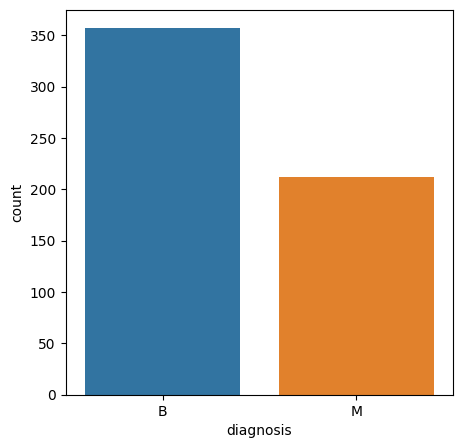

In [37]:
plt.rcParams["figure.figsize"] = (5, 5)
sns.barplot(df_d, x='diagnosis', y='count', hue='diagnosis')


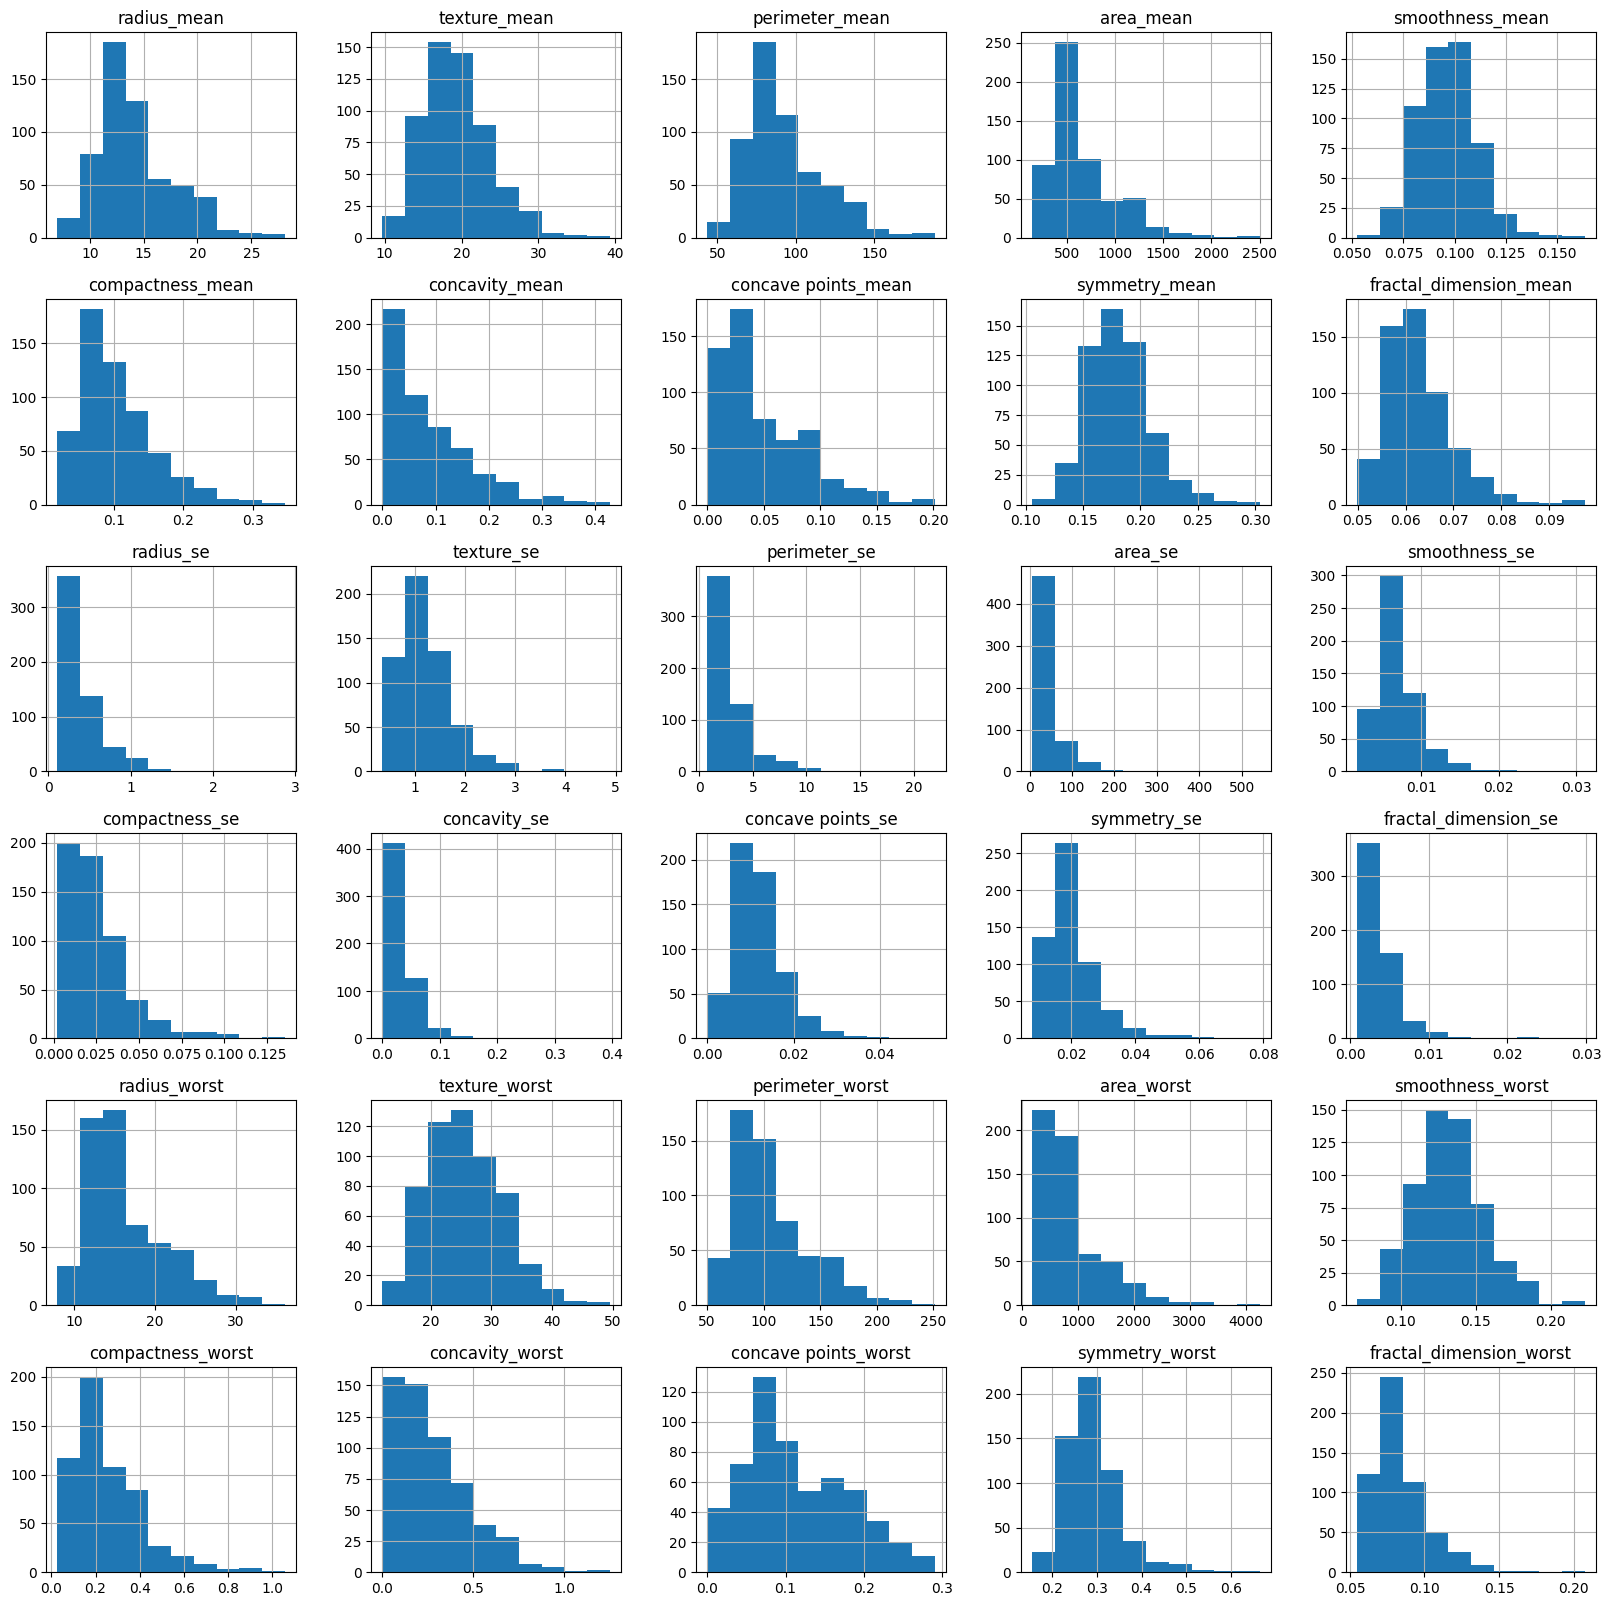

In [38]:
plt.rcParams["figure.figsize"] = (20, 20)
df.hist()
plt.show()

Используем boxplot и группировку по целевой переменной, чтобы понять по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных.

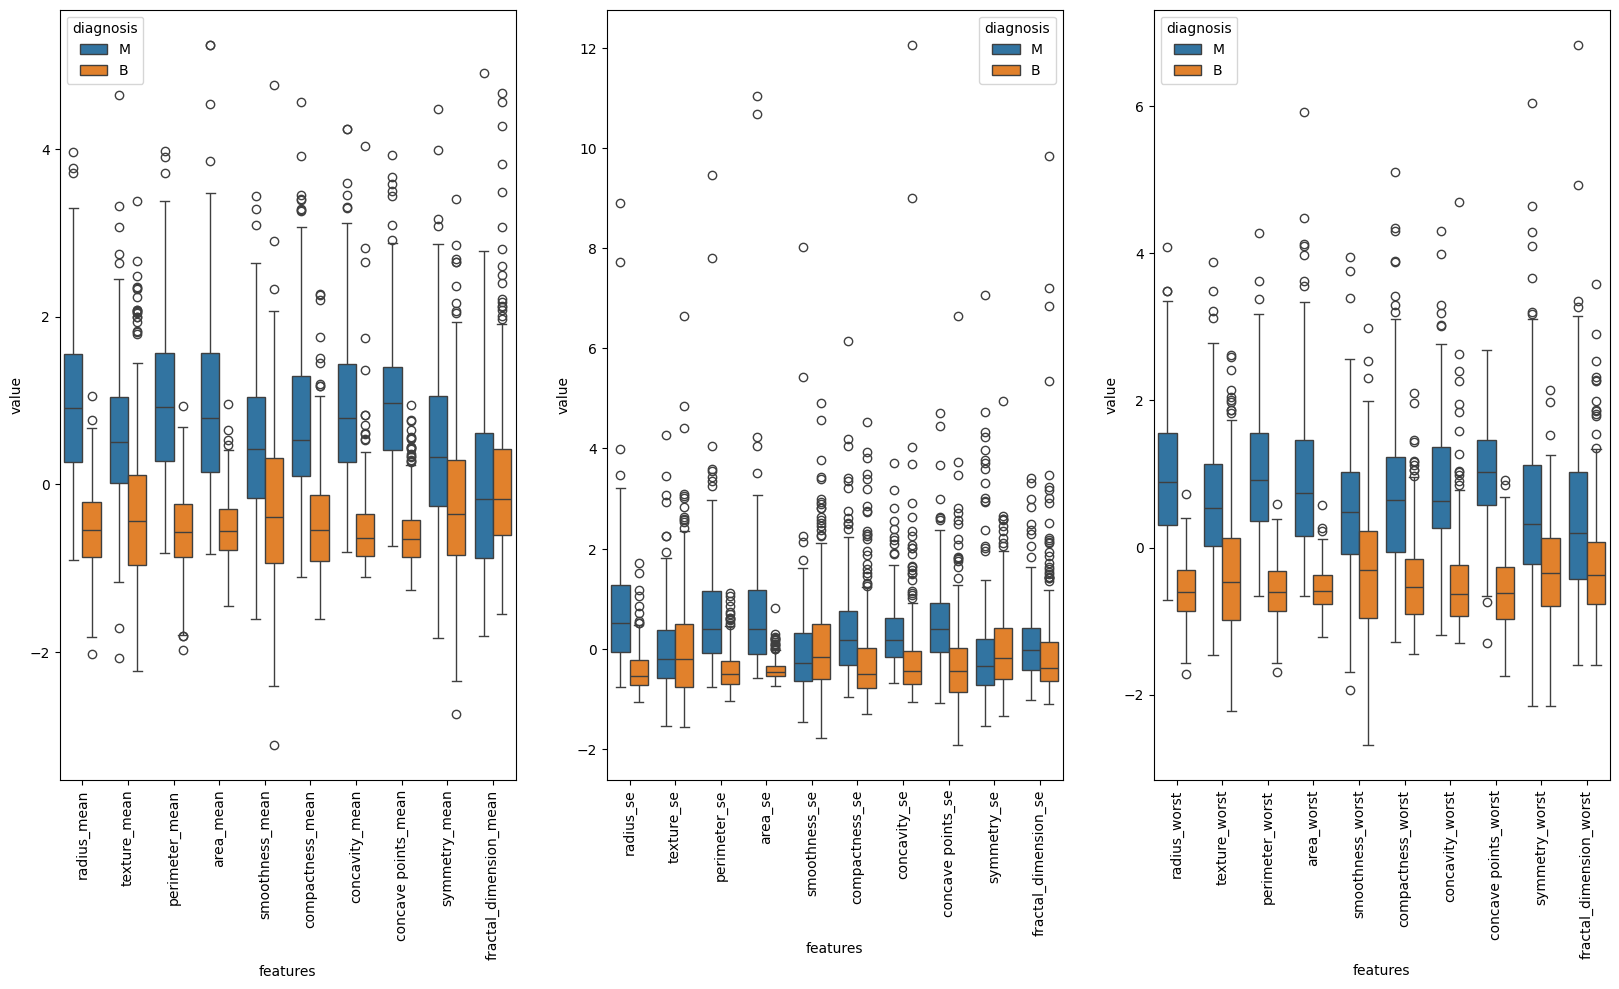

In [39]:
plt.rcParams["figure.figsize"] = (20, 10)
data = df.drop('diagnosis', axis=1)
df_d = df["diagnosis"]
standart_data = (data - data.mean()) / (data.std())


data = pd.concat([df_d, standart_data.iloc[:, 0:10]], axis=1)
data= pd.melt(data, id_vars="diagnosis",
               var_name="features",
               value_name='value')

plt.subplot(1, 3, 1)
sns.boxplot(data=data, x="features", y="value", hue="diagnosis")
plt.xticks(rotation=90)


data = pd.concat([df_d, standart_data.iloc[:, 10:20]], axis=1)
data = pd.melt(data, id_vars="diagnosis",
               var_name="features",
               value_name='value')

plt.subplot(1, 3, 2)
sns.boxplot(data=data, x="features", y="value", hue="diagnosis")
plt.xticks(rotation=90)


data = pd.concat([df_d, standart_data.iloc[:, 20:31]], axis=1)
data = pd.melt(data, id_vars="diagnosis",
               var_name="features",
               value_name='value')

plt.subplot(1, 3, 3)
sns.boxplot(data=data, x="features", y="value", hue="diagnosis")
plt.xticks(rotation=90)

plt.show()

Можно замеить, что для разделения злокачественных новообразований от доброкачественных хорошо подходят фичи:
raduis_mean, texture_mean, perimeter_mean, area_mean и тд, потому что есть явное разделение признаков.

Посторим heatmap, чтобы узнать какие признаки сильно скоррелированы.

<Axes: >

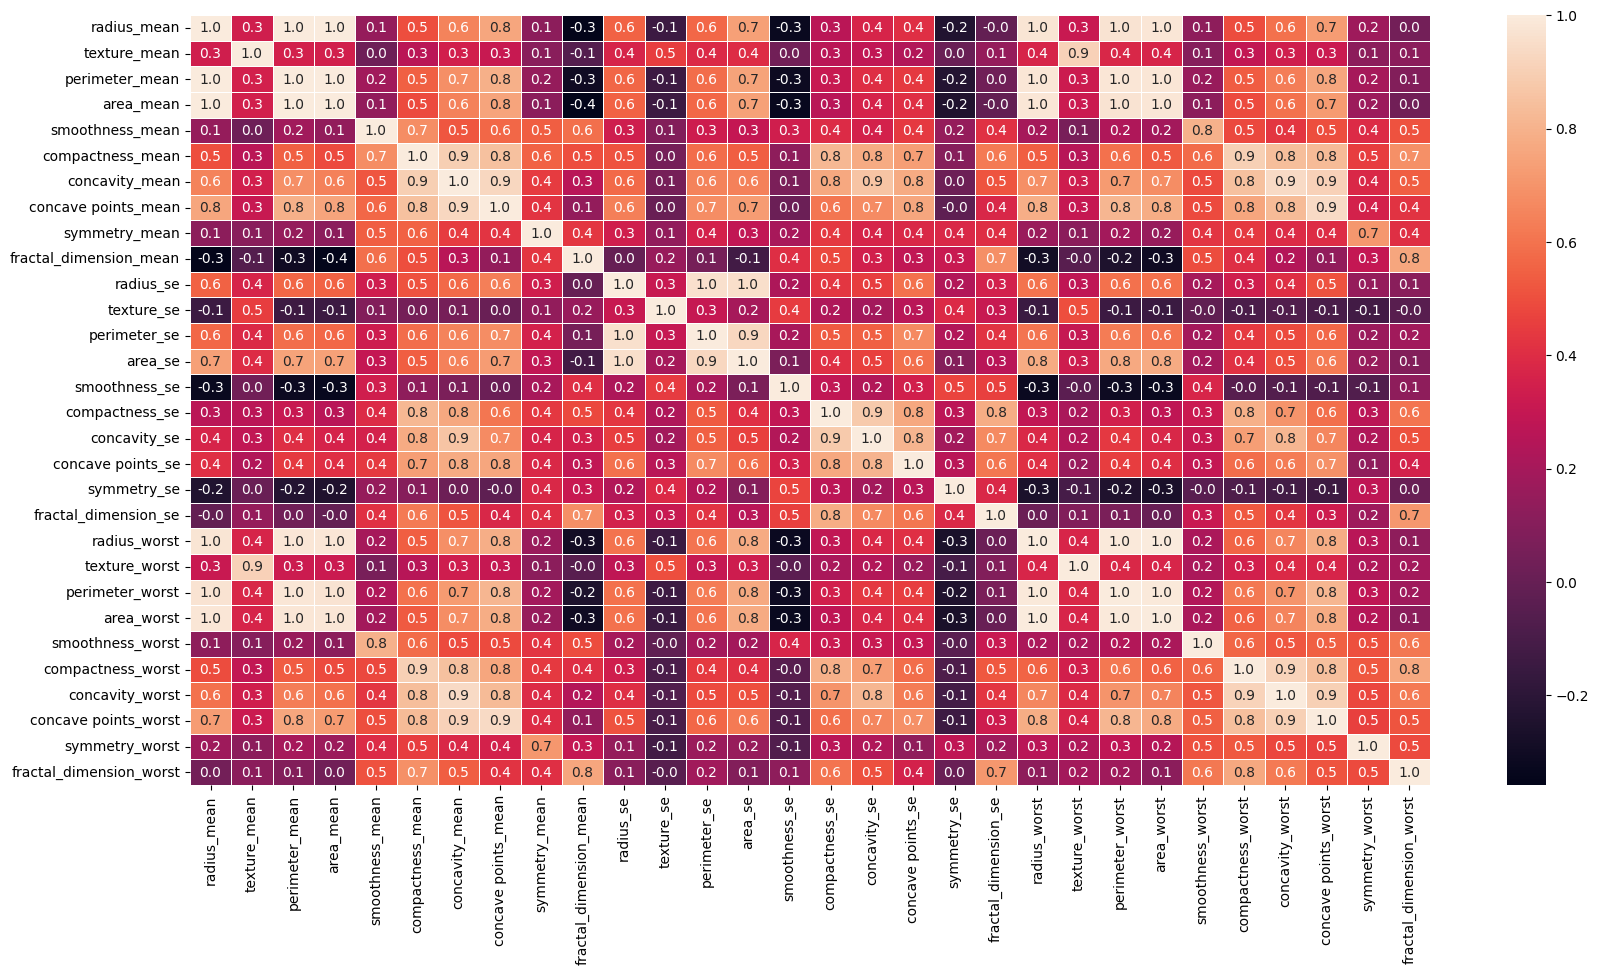

In [40]:
plt.rcParams["figure.figsize"] = (20, 10)
X = df.drop('diagnosis', axis=1)
sns.heatmap(X.corr(method='spearman'),  annot=True, linewidths=.5, fmt= '.1f')

Соберем пары фич, корреляция которых превышает более 0.9, но не равно 1.0. А так же удалим пары типа: ['area_mean', 'radius_mean'] == ['radius_mean', 'area_mean']

In [41]:
c_tab = X.corr(method='spearman')

lst_col = X.columns

def get_pair_corr_colums(corr_tab, columns_list, min_val):
    raw_corr_lst_col = []
    corr_lst_col = []
    for i in columns_list:
        for j in columns_list:
            val = corr_tab[i][j]
            if i == j:
                continue
            if val >= min_val and val != 1.0:
                raw_corr_lst_col.append([i, j])

    raw_corr_lst_col = [sorted(i) for i in raw_corr_lst_col]
    for sub_lst in raw_corr_lst_col:
        if sub_lst not in corr_lst_col:
            corr_lst_col.append(sub_lst)
    return corr_lst_col

pair_corr_tab = get_pair_corr_colums(c_tab, lst_col, 0.9)
pair_corr_tab

[['perimeter_mean', 'radius_mean'],
 ['area_mean', 'radius_mean'],
 ['radius_mean', 'radius_worst'],
 ['perimeter_worst', 'radius_mean'],
 ['area_worst', 'radius_mean'],
 ['texture_mean', 'texture_worst'],
 ['area_mean', 'perimeter_mean'],
 ['perimeter_mean', 'radius_worst'],
 ['perimeter_mean', 'perimeter_worst'],
 ['area_worst', 'perimeter_mean'],
 ['area_mean', 'radius_worst'],
 ['area_mean', 'perimeter_worst'],
 ['area_mean', 'area_worst'],
 ['compactness_mean', 'compactness_worst'],
 ['concave points_mean', 'concavity_mean'],
 ['concavity_mean', 'concavity_worst'],
 ['concave points_worst', 'concavity_mean'],
 ['concave points_mean', 'concave points_worst'],
 ['perimeter_se', 'radius_se'],
 ['area_se', 'radius_se'],
 ['area_se', 'perimeter_se'],
 ['perimeter_worst', 'radius_worst'],
 ['area_worst', 'radius_worst'],
 ['area_worst', 'perimeter_worst'],
 ['compactness_worst', 'concavity_worst'],
 ['concave points_worst', 'concavity_worst']]

Составим попарные scatterplot для сильно скоррелированных признаков

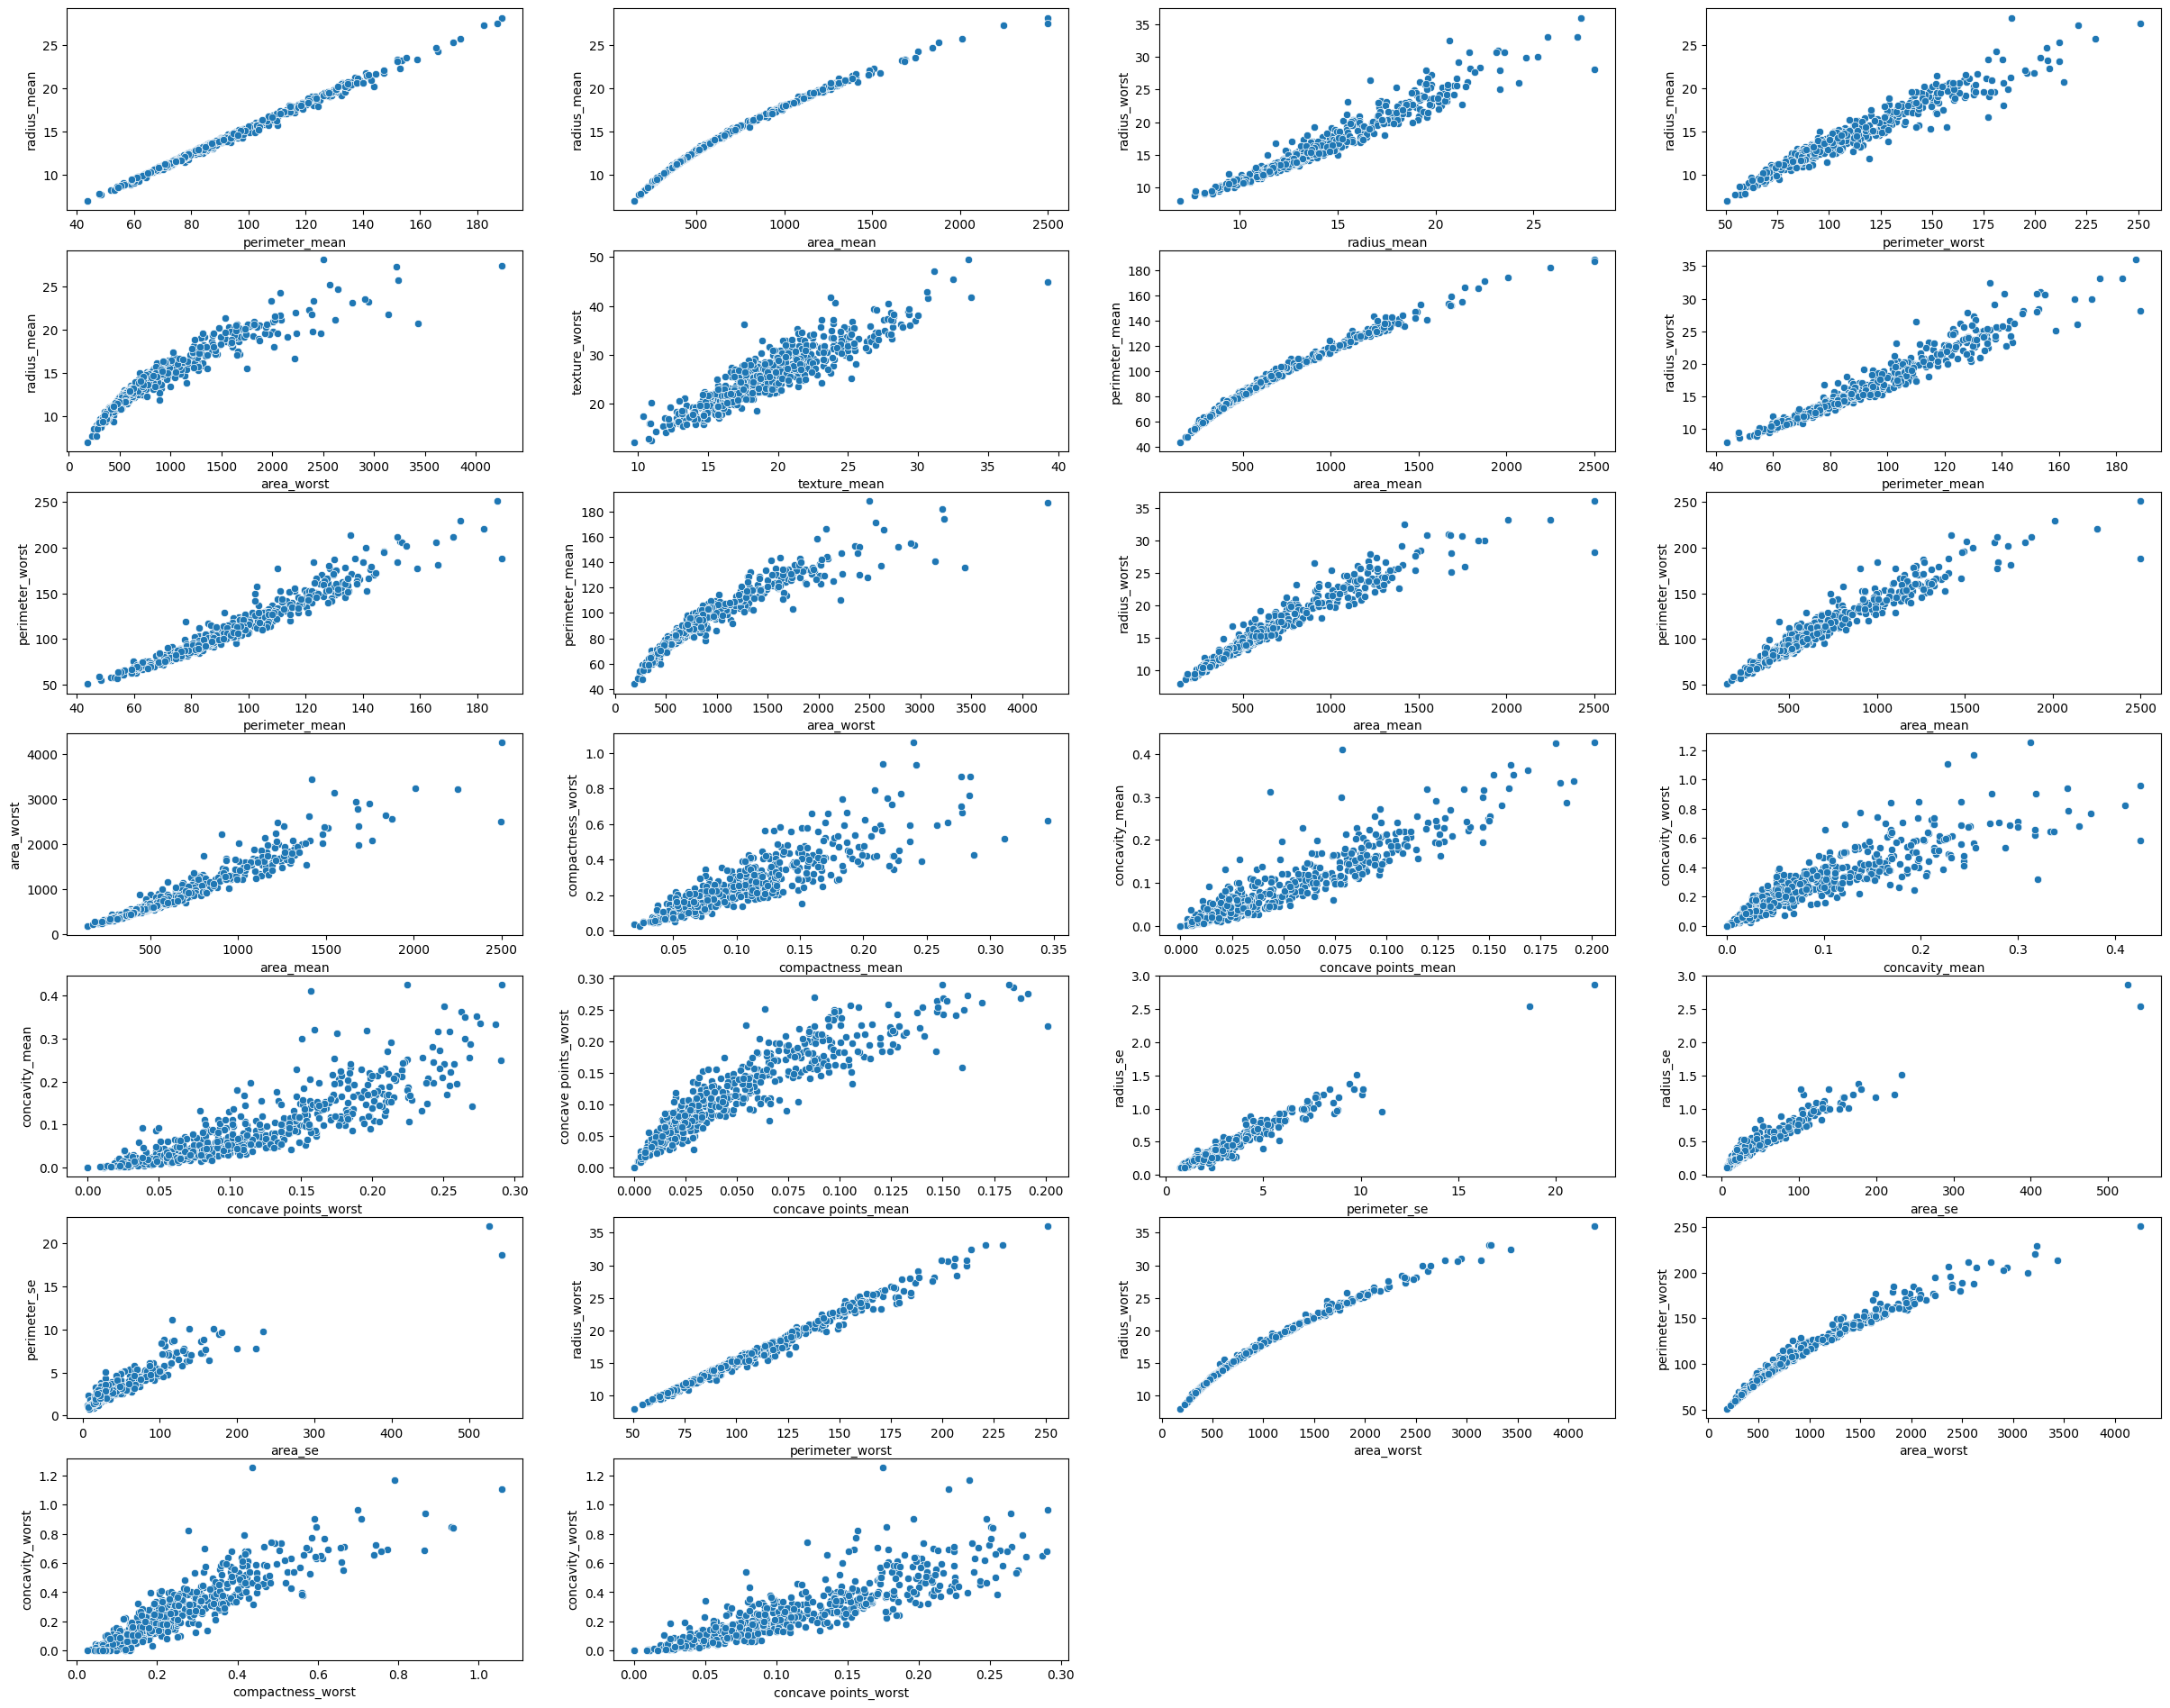

In [42]:
plt.rcParams["figure.figsize"] = (30, 90)

len_lst = len(pair_corr_tab)
count = 1
while count <= len_lst:
    for g in pair_corr_tab:
        col_1 = g[0]
        col_2 = g[1]
        plt.subplot(len_lst, 4, count)
        sns.scatterplot(data=X, x=col_1, y=col_2)
        count += 1


# KNN

Приведем diagnosis к бинарному виду

In [43]:
data = df
data['diagnosis'] = data['diagnosis'].replace({'B': 0, 'M': 1}).astype('Int64')

Разделем данные на train и test

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['diagnosis'], axis=1), data['diagnosis'], test_size=0.30, random_state=0, stratify=data['diagnosis']
)

Стандартизируем данные

In [45]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Стандартизация требуется, чтобы преобразовать данные в единный масштаб

Оценим метрики качества бинарной классификации

In [46]:
knn = KNeighborsClassifier(n_neighbors=3)

knn_model = knn.fit(X_train_scaled, y_train)

knn_predictions = knn.predict(X_train_scaled)

accuracy = accuracy_score(knn_predictions, y_train)
precision = precision_score(knn_predictions, y_train)
recall = recall_score(knn_predictions, y_train)
f1 = f1_score(knn_predictions, y_train)

print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1: {f1}")

accuracy: 0.9874371859296482
precision: 0.9662162162162162
recall: 1.0
f1: 0.9828178694158075


Сделаем первичную кросс-валидацию

In [47]:
knn = KNeighborsClassifier()

scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='f1')
print(scores)
print('mean', scores.mean())
print('std', scores.std())
print('Точность: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

[0.96551724 0.96551724 0.98305085 0.88461538 0.98245614]
mean 0.956231371036502
std 0.036628751352488255
Точность: 0.956 (0.037)


Постром ROC-кривую и посчитаем площадь под ней

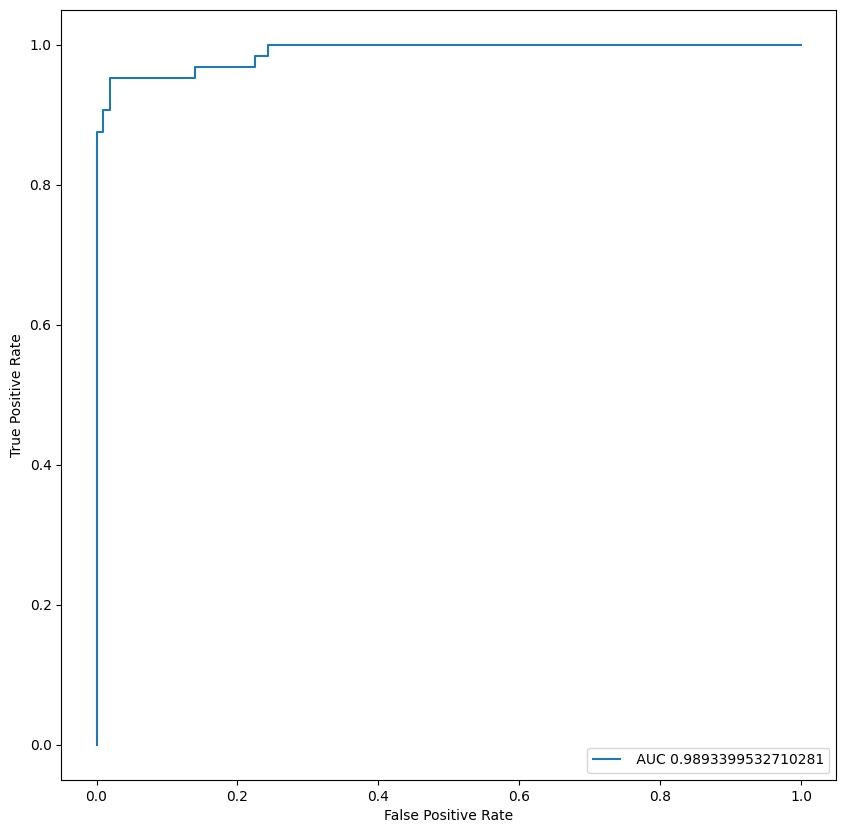

In [48]:
from sklearn.metrics import roc_auc_score


plt.rcParams["figure.figsize"] = (10, 10)

log_regression = LogisticRegression()
log_regression.fit(X_train_scaled, y_train)

y_pred_proba = log_regression.predict_proba(X_test_scaled)[::, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=" AUC "+ str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

Проведем поиск оптимальных параметров

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
        'n_neighbors': range(1, 50),
        'p': range(1, 4)
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best CV score: {:.3f}, best CV k: {}".format(
    grid_search.best_score_, grid_search.best_estimator_.n_neighbors)
)

print("Best Hyperparameters:", grid_search.best_params_)


test_predictions = grid_search.best_estimator_.predict(X_test_scaled)
print("Resulting test score: {:.3f}".format(f1_score(test_predictions, y_test)))

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best CV score: 0.961, best CV k: 3
Best Hyperparameters: {'n_neighbors': 3, 'p': 1}
Resulting test score: 0.938


Повторим кросс-валидацию

In [50]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=3)

scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='f1')
print(scores)
print('mean', scores.mean())
print('std', scores.std())
print('Точность: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

[0.98305085 0.96551724 0.95081967 0.90566038 0.98245614]
mean 0.9575008557354906
std 0.028537358527858825
Точность: 0.958 (0.029)
